Step 0 - import NN libraries = 0.5 points

In [1]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Dense, Flatten
from keras.models import Sequential 

from tensorflow.keras.utils import to_categorical




Step 1 - Load the data Reference: https://www.analyticsvidhya.com/blog/2020/12/mlp-multilayer-perceptron-simple-overview/


In [2]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
num_labels = len(np.unique(y_train))
print("total labels:{}".format(num_labels))
print("labels:{}".format(np.unique(y_train)))

total labels:10
labels:[0 1 2 3 4 5 6 7 8 9]


In [4]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


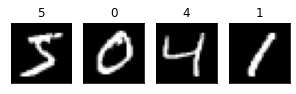

In [6]:
# Display some images
fig, axes = plt.subplots(ncols=4, sharex=False, 
    sharey=True, figsize=(5, 5))
for i in range(4):
    axes[i].set_title(y_train[i])
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
def create_model(): 
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(5, activation='sigmoid'),
        Dense(100, activation='relu'),
        Dense(10, activation='softmax'),
        # model.add(Dense(5, activation='sigmoid'))
    # model.add(Dense(10, activation='softmax'))
    ])
    return model

In [8]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 5)                 3925      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               600       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 5,535
Trainable params: 5,535
Non-trainable params: 0
_________________________________________________________________


In [9]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(
    optimizer=sgd, 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [10]:
history_constant = model.fit(
    X_train, 
    y_train, 
    epochs=100, 
    validation_split=0.2,
    batch_size=32
)

Epoch 1/100
1500/1500 [==============================] - 4s 2ms/step - loss: 2.0212 - accuracy: 0.3110 - val_loss: 1.8280 - val_accuracy: 0.4100
Epoch 2/100
1500/1500 [==============================] - 3s 2ms/step - loss: 1.4206 - accuracy: 0.5784 - val_loss: 1.2125 - val_accuracy: 0.6382
Epoch 3/100
1500/1500 [==============================] - 3s 2ms/step - loss: 1.1602 - accuracy: 0.6517 - val_loss: 0.9911 - val_accuracy: 0.7242
Epoch 4/100
1500/1500 [==============================] - 3s 2ms/step - loss: 1.0538 - accuracy: 0.6800 - val_loss: 0.9344 - val_accuracy: 0.7281
Epoch 5/100
1500/1500 [==============================] - 3s 2ms/step - loss: 1.0114 - accuracy: 0.6939 - val_loss: 0.9504 - val_accuracy: 0.7182
Epoch 6/100
1500/1500 [==============================] - 3s 2ms/step - loss: 1.0051 - accuracy: 0.6894 - val_loss: 0.8882 - val_accuracy: 0.7362
Epoch 7/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.9145 - accuracy: 0.7254 - val_loss: 0.8579 - val_ac

In [11]:
!pip install livelossplot

In [12]:
from livelossplot import PlotLossesKeras

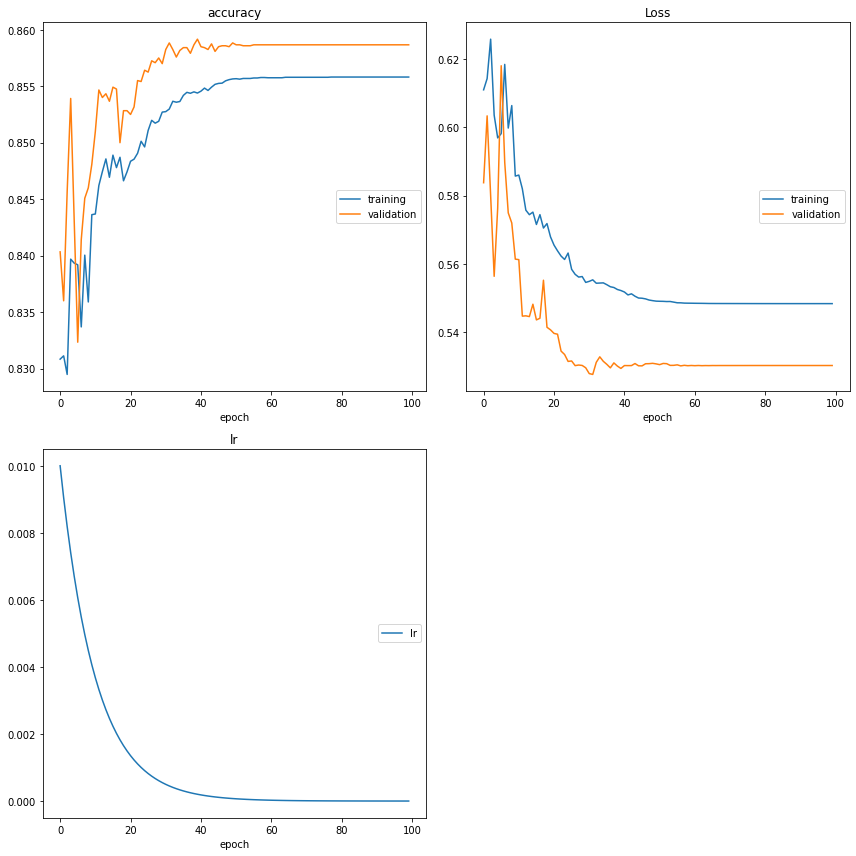

accuracy
	training         	 (min:    0.829, max:    0.856, cur:    0.856)
	validation       	 (min:    0.832, max:    0.859, cur:    0.859)
Loss
	training         	 (min:    0.548, max:    0.626, cur:    0.548)
	validation       	 (min:    0.528, max:    0.618, cur:    0.530)
lr
	lr               	 (min:    0.000, max:    0.010, cur:    0.000)


In [13]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
# from keras.optimizers import SGD
from keras.wrappers.scikit_learn import KerasRegressor

from keras.callbacks import LearningRateScheduler
from numpy import math

initial_learning_rate = 0.01
def lr_exp_decay(epoch, lr):
    k = 0.1
    return initial_learning_rate * math.exp(-k*epoch)

# Fit the model to the training data
history_exp_decay = model.fit(
    X_train, 
    y_train, 
    epochs=100, 
    validation_split=0.2,
    batch_size=32,
    callbacks=[LearningRateScheduler(lr_exp_decay, verbose=1),PlotLossesKeras()],
)

In [14]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

def plot_lr(history):
    learning_rate = history.history['lr']
    epochs = range(1, len(learning_rate) + 1)
    plt.plot(epochs, learning_rate)
    plt.title('Learning rate')
    plt.xlabel('Epochs')
    plt.ylabel('Learning rate')
    plt.show()

In [15]:


def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()



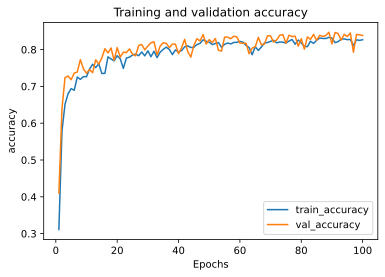

In [16]:
plot_metric(history_constant, 'accuracy')

# Adam Optimizer

In [18]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()
model.add(layers.Dense(64, kernel_initializer='uniform', input_shape=(10,)))
model.add(layers.Activation('softmax'))

opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt)


In [19]:
# pass optimizer by name: default parameters will be used
model.compile(loss='categorical_crossentropy', optimizer='adam')


In [20]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = keras.optimizers.SGD(learning_rate=lr_schedule)


Early Stopping

In [32]:
tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)


In [33]:
datagen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.10,  
        width_shift_range=0.1, 
        height_shift_range=0.1)

In [40]:
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras import regularizers
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D
from keras.layers import BatchNormalization
from keras.layers import Flatten
from keras.callbacks import LearningRateScheduler


In [41]:
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
Y_train = np_utils.to_categorical(Y_train, num_classes = 10)

AttributeError: ignored

In [36]:
# PREVIEW AUGMENTED IMAGES
X_train3 = X_train[9,].reshape((1,28,28,1))
Y_train3 = y_train[9,].reshape((1,10))
plt.figure(figsize=(15,4.5))
for i in range(10):  
    plt.subplot(3, 10, i+1)
    X_train2, Y_train2 = datagen.flow(X_train3,Y_train3).next()
    plt.imshow(X_train2[0].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')
    if i==9: X_train3 = X_train[11,].reshape((1,28,28,1))
    if i==19: X_train3 = X_train[18,].reshape((1,28,28,1))
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

ValueError: ignored

In [27]:


nets = 15
model = [0] *nets
for j in range(nets):
    model[j] = Sequential()

    model[j].add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (28, 28, 1)))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(32, kernel_size = 3, activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Dropout(0.4))

    model[j].add(Conv2D(64, kernel_size = 3, activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(64, kernel_size = 3, activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Dropout(0.4))

    model[j].add(Conv2D(128, kernel_size = 4, activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Flatten())
    model[j].add(Dropout(0.4))
    model[j].add(Dense(10, activation='softmax'))

    # COMPILE WITH ADAM OPTIMIZER AND CROSS ENTROPY COST
    model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [31]:
# DECREASE LEARNING RATE EACH EPOCH
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)
# TRAIN NETWORKS
history = [0] * nets
epochs = 40
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=0, save_best_only=True)
for j in range(nets):
    X_train2, X_val2, Y_train2, Y_val2 = train_test_split(X_train, y_train, test_size = 0.2)
    history[j] = model[j].fit_generator(datagen.flow(X_train2,Y_train2, batch_size=64),
        epochs = epochs, steps_per_epoch = X_train2.shape[0]//64,  
        validation_data = (X_val2,Y_val2), callbacks=[annealer,es,mc], verbose=0)
    print("CNN {0:d}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
            j+1,epochs,max(history[j].history['acc']),max(history[j].history['val_acc']) ))
    if(j==14):
        # Plot training & validation accuracy values
        plt.plot(history[j].history['acc'])
        plt.plot(history[j].history['val_acc'])
        plt.title('Model accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.show()
        # Plot training & validation loss values
        plt.plot(history[j].history['loss'])
        plt.plot(history[j].history['val_loss'])
        plt.title('Model loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.show()

ValueError: ignored